In [2]:
import numpy as np
import pandas as pd

# print(df)
from matplotlib import pyplot as plt

df = pd.read_csv("national-budget.csv")




4343657.744000001
the year is not valid
-1
the year is not valid
-1
the year is not valid
-1
1294623.1549999998


In [6]:
def education_budget(year: int) -> int:
    df1 = df.copy()

    df1 = df1.set_index('שם רמה 2')
    df1 = df1[df1['שנה'] == year]
    if(df1.empty):
        print("the year is not valid")
        return -1;
    df_year_education = df1.loc['חינוך']
    df_year_education = df_year_education[df_year_education['הוצאה/הכנסה'] == 'הכנסה']
    df_year_education = df_year_education[['שנה', 'הוצאה/הכנסה', 'הוצאה נטו']]

    df_year_education.to_csv('bapbap')

    education_budget_sum = df_year_education["הוצאה נטו"].sum() * (-1)

    return education_budget_sum;

print(education_budget(2020))
print(education_budget(1996))
print(education_budget(2023))
print(education_budget(2000.5))
print(education_budget(2000))

4343657.744000001
the year is not valid
-1
the year is not valid
-1
the year is not valid
-1
1294623.1549999998


In [3]:
def security_budget_ratio(year: int) -> float:
    df2 = df.copy()
    df2 = df2.set_index('שם רמה 1')
    df_year = df2[df2['שנה'] == year]
    if(df_year.empty):
        print("the year is not valid")
        return -1;
    df_year_security = df_year.loc['בטחון וסדר ציבורי']
    df_year_security = df_year_security[df_year_security['הוצאה/הכנסה'] == 'הכנסה']
    df_year_security = df_year_security[['שנה', 'הוצאה/הכנסה', 'הוצאה נטו']]

    security_budget_sum = df_year_security["הוצאה נטו"].sum() * (-1)

    df_year_total = df_year[df_year['הוצאה/הכנסה'] == 'הכנסה']
    df_year_total = df_year_total[['שנה', 'הוצאה/הכנסה', 'הוצאה נטו']]
    df_year_total.to_csv('bapbap')
    df_year_total_hiuvi = df_year_total[df_year_total['הוצאה נטו'] > 0]
    df_year_total_shlili = df_year_total[df_year_total['הוצאה נטו'] < 0]

    total_budget_sum = df_year_total_hiuvi["הוצאה נטו"].sum() + df_year_total_shlili["הוצאה נטו"].sum() * (-1)

    return security_budget_sum / total_budget_sum

print(security_budget_ratio(2020))
print(security_budget_ratio(1996))
print(security_budget_ratio(2023))
print(security_budget_ratio(2000.5))
print(security_budget_ratio(2000))


0.03757124272657546
the year is not valid
-1
the year is not valid
-1
the year is not valid
-1
0.00666407779473936


In [4]:
def largest_budget_year(office: str) -> int:
    df_office = df[df['שם רמה 1'] == office]
    if (df_office.empty):
        print("the office is not valid")
        return -1;
    df_office = df_office[df_office['הוצאה/הכנסה'] == 'הכנסה']
    df_office = df_office[['שם רמה 1', 'הוצאה/הכנסה', 'הוצאה נטו', 'שנה']]

    best_year = 1997
    biggest_budget = 0
    for i in range(1997, 2023):
        df_office_i = df_office[df_office['שנה'] == i]

        if df_office_i["הוצאה נטו"].sum() * (-1) > biggest_budget:
            best_year = i
            biggest_budget = df_office_i["הוצאה נטו"].sum() * (-1)

    return best_year


print(largest_budget_year('בטחון וסדר ציבורי'))
print(largest_budget_year('שירותים חברתיים'))
print(largest_budget_year('ענפי משק'))
print(largest_budget_year('123'))

2020
1997
2019
the office is not valid
-1


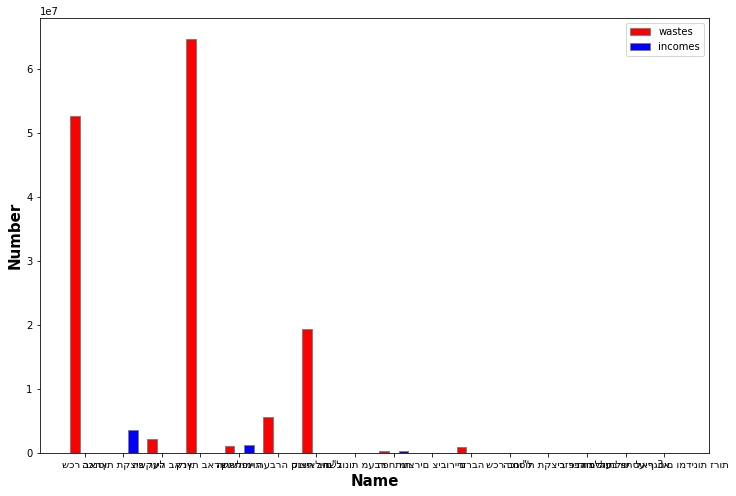

('הכנסות תקציב רגיל', 3627780.8589999997, 'קניות בארץ', 64764105.59800002)
the year is not valid
-1
the office is not valid
-1
the office is not valid
-1


In [5]:

def name_level_2_biggest_waste_and_income(office: str, year: int) -> int:
    df4 = df.copy();
    df4 = df4[df4['שם רמה 1'] == office]
    if (df4.empty):
        print("the office is not valid")
        return -1;
    all_name_level_2 = df4['שם מיון רמה 2'].unique()

    df4 = df.copy();
    df_office = df4[df4['שם רמה 1'] == office]
    df_office_year = df_office[df_office['שנה'] == year]
    if (df_office_year.empty):
        print("the year is not valid")
        return -1;
    df_office_year = df_office_year[['שנה', 'הוצאה/הכנסה', 'הוצאה נטו', 'שם מיון רמה 2']]
    df_office_year.to_csv('bapbap')

    df_office_year_waste = df_office_year[df_office_year['הוצאה/הכנסה'] == 'הוצאה']
    df_office_year_income = df_office_year[df_office_year['הוצאה/הכנסה'] == 'הכנסה']

    biggest_num_waste = 0
    biggest_name_waste = ""
    values_waste = list()
    for i in all_name_level_2:
        df_i = df_office_year_waste[df_office_year_waste['שם מיון רמה 2'] == i]
        values_waste.append(df_i['הוצאה נטו'].sum())
        if df_i['הוצאה נטו'].sum() > biggest_num_waste:
            biggest_num_waste = df_i['הוצאה נטו'].sum()
            biggest_name_waste = i

    df_office_year_income = df_office_year_income[['שנה', 'הוצאה/הכנסה', 'הוצאה נטו', 'שם מיון רמה 2']]
    biggest_num_income = 0
    biggest_name_income = ""
    values_income = list()
    for i in all_name_level_2:
        df_i = df_office_year_income[df_office_year_income['שם מיון רמה 2'] == i]
        values_income.append(df_i['הוצאה נטו'].sum() * (-1))
        if (df_i['הוצאה נטו'].sum() * (-1)) > biggest_num_income:
            biggest_num_income = df_i['הוצאה נטו'].sum() * (-1)
            biggest_name_income = i

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize=(12, 8))

    # set height of bar
    wastes = values_waste
    incomes = values_income

    # Set position of bar on X axis
    br1 = np.arange(len(wastes))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    plt.bar(br1, wastes, color='r', width=barWidth,
            edgecolor='grey', label='wastes')

    plt.bar(br3, incomes, color='b', width=barWidth,
            edgecolor='grey', label='incomes')

    # Adding Xticks
    plt.xlabel('Name', fontweight='bold', fontsize=15)
    plt.ylabel('Number', fontweight='bold', fontsize=15)
    plt.xticks([r + barWidth for r in range(len(wastes))],
               all_name_level_2)

    plt.legend()
    plt.show()

    return biggest_name_income, biggest_num_income, biggest_name_waste, biggest_num_waste

print(name_level_2_biggest_waste_and_income('בטחון וסדר ציבורי', 2000))
print(name_level_2_biggest_waste_and_income('בטחון וסדר ציבורי', 10))
print(name_level_2_biggest_waste_and_income('123', 2000))
print(name_level_2_biggest_waste_and_income('123', 123))
